In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import chisquare
from scipy import stats
import seaborn as sns

## Get to know about the data

In [2]:
# Import the data into Pandas dataframe

df = pd.read_csv("bank-additional-full.csv", sep=';')

In [3]:
# Make the variable names more descriptive

df=df.rename(columns = {'housing':'housingLoan'})
df=df.rename(columns = {'loan':'personalLoan'})
df=df.rename(columns = {'contact':'contactMethod'})
df=df.rename(columns = {'month':'contactMonth'})
df=df.rename(columns = {'day_of_week':'contactDay'})
df=df.rename(columns = {'duration':'contactDuration'})
df=df.rename(columns = {'campaign':'numberOfContact'})
df=df.rename(columns = {'pdays':'lastContact_daysSince'})
df=df.rename(columns = {'previous':'pastCam_numberOfContact'})
df=df.rename(columns = {'poutcome':'pastCam_result'})
df=df.rename(columns = {'y':'subscribe'})
df=df.rename(columns = {'emp.var.rate':'idx_employment'})
df=df.rename(columns = {'cons.price.idx':'idx_price'})
df=df.rename(columns = {'cons.conf.idx':'idx_confidence'})
df=df.rename(columns = {'euribor3m':'idx_euribor'})
df=df.rename(columns = {'nr.employed':'idx_employeesNum'})

In [4]:
df.head()

,age,job,marital,education,default,housingLoan,personalLoan,contactMethod,contactMonth,contactDay,...,numberOfContact,lastContact_daysSince,pastCam_numberOfContact,pastCam_result,idx_employment,idx_price,idx_confidence,idx_euribor,idx_employeesNum,subscribe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Additionally wrangle the data

In [5]:
# Transform the level names for easier processing - subscription

df['subscribe'] = df['subscribe'].map({'yes': 1, 'no': 0})

### 2. age

In [6]:
# Check the distribution of values 

df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [7]:
df.loc[df.age < 30, 'age'] = 20
df.loc[(df.age < 40)&(df.age > 29), 'age'] = 30
df.loc[(df.age < 50)&(df.age > 39), 'age'] = 40
df.loc[(df.age < 60)&(df.age > 49), 'age'] = 50
df.loc[df.age > 59, 'age'] = 60

In [8]:
df.age = df.age.astype('str')

In [9]:
df.loc[df.age == '20', 'age'] = "10-20s"
df.loc[df.age == '30', 'age'] = "30s"
df.loc[df.age == '40', 'age'] = "40s"
df.loc[df.age == '50', 'age'] = "50s"
df.loc[df.age == '60', 'age'] = "60s+"

In [10]:
df.age.value_counts()

30s       16938
40s       10526
50s        6862
10-20s     5669
60s+       1193
Name: age, dtype: int64

### 3. job

In [11]:
# Check the distribution of values 

df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [12]:
# Replace 

df.loc[df.job == 'entrepreneur', 'job'] = 'self-employed'
df.loc[(df.job == 'housemaid')|(df.job == 'student')|
       (df.job == 'unemployed')|(df.job == 'unknown')|(df.job == 'retired'), 'job'] = 'low_earning'

In [13]:

df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
low_earning       4999
services          3969
management        2924
self-employed     2877
Name: job, dtype: int64

### 4. marital

In [14]:
# Check the distribution of values 

df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [15]:
# Replace 

df.loc[(df.marital == 'unknown')|(df.marital == 'divorced'), 'marital'] = 'other'

In [16]:
df.marital.value_counts()

married    24928
single     11568
other       4692
Name: marital, dtype: int64

### 5. education

In [17]:
# Check the distribution of values 

df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [18]:
# Replace 

df.loc[(df.education == 'basic.4y')|(df.education == 'basic.6y')|
       (df.education == 'basic.9y')|(df.education == 'illiterate'), 'education'] = 'basic'

In [19]:
df.education.value_counts()

basic                  12531
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

### 6. default

In [20]:
# Check the distribution of values 

df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [21]:
df.loc[df.default == 'yes', 'default'] = 'unknown'

In [22]:
df.default.value_counts()

no         32588
unknown     8600
Name: default, dtype: int64

### 7. housingLoan

In [23]:
# Check the distribution of values 

df.housingLoan.value_counts()

yes        21576
no         18622
unknown      990
Name: housingLoan, dtype: int64

In [24]:
# Replace unknown with mode

df.loc[df.housingLoan == 'unknown', 'housingLoan'] = 'yes'

In [25]:
df.housingLoan.value_counts()

yes    22566
no     18622
Name: housingLoan, dtype: int64

### 8. personalLoan

In [26]:
# Check the distribution of values 

df.personalLoan.value_counts()

no         33950
yes         6248
unknown      990
Name: personalLoan, dtype: int64

In [27]:
# Replace unknown with mode

df.loc[df.personalLoan == 'unknown', 'personalLoan'] = 'no'

In [28]:
df.personalLoan.value_counts()

no     34940
yes     6248
Name: personalLoan, dtype: int64

### 9. contactMethod

In [29]:
# Check the distribution of values 

df.contactMethod.value_counts()

cellular     26144
telephone    15044
Name: contactMethod, dtype: int64

- The variable contactMethod doesn't have any missing nor illogical level.

### 10. contactMonth

In [30]:
# Check the distribution of values 

df.contactMonth.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: contactMonth, dtype: int64

In [31]:
# Replace 
df.loc[df.contactMonth == 'mar', 'contactMonth'] = 'Q1'
df.loc[(df.contactMonth == 'apr')|(df.contactMonth == 'may')
       |(df.contactMonth == 'jun'), 'contactMonth'] = 'Q2'
df.loc[(df.contactMonth == 'jul')|(df.contactMonth == 'aug')
       |(df.contactMonth == 'sep'), 'contactMonth'] = 'Q3'
df.loc[(df.contactMonth == 'oct')|(df.contactMonth == 'nov')
       |(df.contactMonth == 'dec'), 'contactMonth'] = 'Q4'

In [32]:
df.contactMonth.value_counts()

Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: contactMonth, dtype: int64

### 11. contactDay

In [33]:
# Check the distribution of values 

df.contactDay.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: contactDay, dtype: int64

### 12. contactDuration

In [34]:
# Check the distribution of values 

df.contactDuration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: contactDuration, dtype: float64

In [35]:
df.loc[df.contactDuration < 250, 'contactDuration'] = 0
df.loc[(df.contactDuration < 575)&(df.contactDuration > 249), 'contactDuration'] = 250
df.loc[df.contactDuration > 574, 'contactDuration'] = 575

In [36]:
df["contactDuration"] = df["contactDuration"].astype("str")

In [37]:
df.loc[df.contactDuration == '0', 'contactDuration'] = "short_call"
df.loc[df.contactDuration == '250', 'contactDuration'] = "med_call"
df.loc[df.contactDuration == '575', 'contactDuration'] = "long_call"

In [38]:
df.contactDuration.value_counts()

short_call    26867
med_call      10516
long_call      3805
Name: contactDuration, dtype: int64

### 13. numberOfContact 

In [39]:
# Check the distribution of values 

df.numberOfContact.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: numberOfContact, dtype: float64

In [40]:
df.loc[df.numberOfContact < 4, 'numberOfContact'] = 0
df.loc[df.numberOfContact > 3, 'numberOfContact'] = 4

In [41]:
df["numberOfContact"] = df["numberOfContact"].astype("str")

In [42]:
df.loc[df.numberOfContact == '0', 'numberOfContact'] = '1to3'
df.loc[df.numberOfContact == '4', 'numberOfContact'] = '4+'

In [43]:
df.numberOfContact.value_counts()

1to3    33553
4+       7635
Name: numberOfContact, dtype: int64

### 14. pastCam_exposed

In [44]:
# Check the distribution of values 

df.pastCam_result.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: pastCam_result, dtype: int64

In [45]:
# Create a new variable based on the values in the pastCam_result

df['pastCam_exposed'] = 1
df.loc[df['pastCam_result']=='nonexistent','pastCam_exposed'] = 0

In [46]:
# Check the distribution of values 

df.pastCam_exposed.value_counts()

0    35563
1     5625
Name: pastCam_exposed, dtype: int64

### 15. pastCam_numberOfContact

In [47]:
# Replace values to null for the instances without past campaign experience

df.loc[df['pastCam_exposed']==0,'pastCam_numberOfContact'] = None

In [48]:
# Check the distribution of values 

df.pastCam_numberOfContact.describe()

count    5625.000000
mean        1.266489
std         0.639158
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: pastCam_numberOfContact, dtype: float64

In [49]:
df.loc[df.pastCam_numberOfContact == 1, 'pastCam_numberOfContact'] = 1
df.loc[df.pastCam_numberOfContact != 1, 'pastCam_numberOfContact'] = 2

In [50]:
df["pastCam_numberOfContact"] = df["pastCam_numberOfContact"].astype("str")

df.loc[df.pastCam_numberOfContact == 1, 'pastCam_numberOfContact'] = '1'
df.loc[df.pastCam_numberOfContact == 2, 'pastCam_numberOfContact'] = 'morethan2'

In [51]:
df.pastCam_numberOfContact.value_counts()

2.0    36627
1.0     4561
Name: pastCam_numberOfContact, dtype: int64

### 16. pastCam_result

In [52]:
# Replace values to null for the instances without past campaign experience

df.loc[df['pastCam_exposed']==0,'pastCam_result'] = None

In [53]:
# Check the distribution of values 

df.pastCam_result.value_counts()

failure    4252
success    1373
Name: pastCam_result, dtype: int64

### 17. lastContact_daysSince

In [54]:
# Check the distribution of values 

df.lastContact_daysSince.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: lastContact_daysSince, dtype: float64

In [55]:
df = df.drop('lastContact_daysSince',axis=1)

### 18. idx_employment

In [56]:
# Check the distribution of values 

df.idx_employment.describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: idx_employment, dtype: float64

- The variable idx_employment doesn't have any missing nor illogical values ranging from 0.08 to 1.4

### 19. idx_price

In [57]:
# Check the distribution of values 

df.idx_price.describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: idx_price, dtype: float64

- The variable idx_confidence doesn't have any missing nor illogical values ranging from 93.58 to 94.77

### 20. idx_confidence

In [58]:
# Check the distribution of values 

df.idx_confidence.describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: idx_confidence, dtype: float64

- The variable idx_confidence doesn't have any missing nor illogical values ranging from -50.8 to -26.9

### 21. idx_euribor

In [59]:
# Check the distribution of values 

df.idx_euribor.describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: idx_euribor, dtype: float64

- The variable idx_euribor doesn't have any missing nor illogical values ranging from 0.63 to 5.04

### 22. idx_employeesNum

In [60]:
# Check the distribution of values 

df.idx_employeesNum.describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: idx_employeesNum, dtype: float64

- The variable idx_employeesNum doesn't have any missing nor illogical values ranging from 4963.6 to 5228

## Export and import wrangled data

In [61]:
df.shape

(41188, 21)

In [62]:
df.dtypes

age                         object
job                         object
marital                     object
education                   object
default                     object
housingLoan                 object
personalLoan                object
contactMethod               object
contactMonth                object
contactDay                  object
contactDuration             object
numberOfContact             object
pastCam_numberOfContact     object
pastCam_result              object
idx_employment             float64
idx_price                  float64
idx_confidence             float64
idx_euribor                float64
idx_employeesNum           float64
subscribe                    int64
pastCam_exposed              int64
dtype: object

In [63]:
# Save the dataframe into a pickle file

pickle.dump( df, open( "df_new1.pickle", "wb" ) )

In [64]:
df.to_csv('df_new1.csv')

In [65]:
df.head()

,age,job,marital,education,default,housingLoan,personalLoan,contactMethod,contactMonth,contactDay,...,numberOfContact,pastCam_numberOfContact,pastCam_result,idx_employment,idx_price,idx_confidence,idx_euribor,idx_employeesNum,subscribe,pastCam_exposed
0,50s,low_earning,married,basic,no,no,no,telephone,Q2,mon,...,1to3,2.0,None,1.1,93.994,-36.4,4.857,5191.0,0,0
1,50s,services,married,high.school,unknown,no,no,telephone,Q2,mon,...,1to3,2.0,None,1.1,93.994,-36.4,4.857,5191.0,0,0
2,30s,services,married,high.school,no,yes,no,telephone,Q2,mon,...,1to3,2.0,None,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40s,admin.,married,basic,no,no,no,telephone,Q2,mon,...,1to3,2.0,None,1.1,93.994,-36.4,4.857,5191.0,0,0
4,50s,services,married,high.school,no,no,yes,telephone,Q2,mon,...,1to3,2.0,None,1.1,93.994,-36.4,4.857,5191.0,0,0


In [3]:
# Load the dataframe back from the pickle file.

df_new = pickle.load( open( "df_new.pickle", "rb" ) )

In [67]:
df['age']

0           50s
1           50s
2           30s
3           40s
4           50s
5           40s
6           50s
7           40s
8        10-20s
9        10-20s
10          40s
11       10-20s
12       10-20s
13          50s
14          30s
15          50s
16          30s
17          40s
18          50s
19          30s
20          30s
21          50s
22          50s
23          40s
24          30s
25          30s
26          50s
27          30s
28          50s
29          50s
          ...  
41158       30s
41159       30s
41160       30s
41161       30s
41162      60s+
41163       30s
41164       50s
41165       30s
41166       30s
41167       30s
41168       30s
41169      60s+
41170       40s
41171       30s
41172       30s
41173      60s+
41174      60s+
41175       30s
41176       30s
41177       50s
41178      60s+
41179      60s+
41180       30s
41181       30s
41182    10-20s
41183      60s+
41184       40s
41185       50s
41186       40s
41187      60s+
Name: age, Length: 41188

In [68]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

(array([ 1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  1193. ,   2767.5,   4342. ,   5916.5,   7491. ,   9065.5,
         10640. ,  12214.5,  13789. ,  15363.5,  16938. ]),
 <a list of 10 Patch objects>)

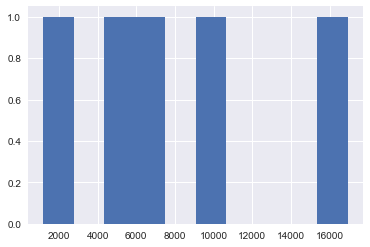

In [80]:
plt.hist()

In [86]:
pd.DataFrame(df['age'].value_counts())

,age
30s,16938
40s,10526
50s,6862
10-20s,5669
60s+,1193


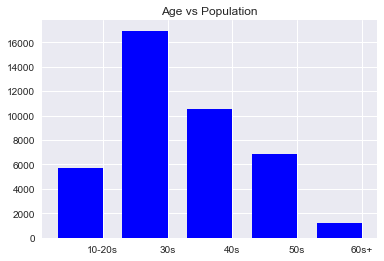

In [89]:
import numpy as np
import matplotlib.pyplot as plt

alphab = ['10-20s', '30s', '40s', '50s', '60s+']
frequencies = [5669, 16938, 10526, 6862, 1193]

pos = np.arange(len(alphab))
width = 0.7     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)
plt.title("Age vs Population")
plt.bar(pos, frequencies, width, color='b')
plt.show()

In [117]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housingLoan',
       'personalLoan', 'contactMethod', 'contactMonth', 'contactDay',
       'contactDuration', 'numberOfContact', 'pastCam_numberOfContact',
       'pastCam_result', 'idx_employment', 'idx_price', 'idx_confidence',
       'idx_euribor', 'idx_employeesNum', 'subscribe', 'pastCam_exposed'],
      dtype='object')

In [118]:
df['education'].value_counts()

basic                  12531
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

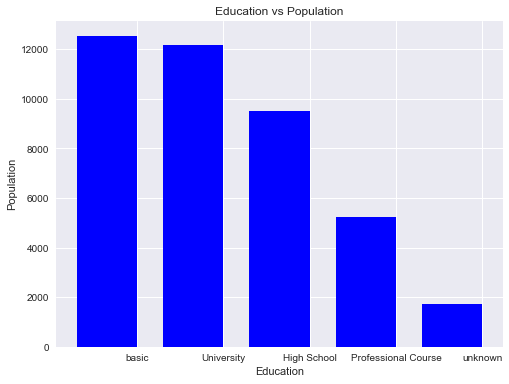

In [119]:
import numpy as np
import matplotlib.pyplot as plt

alphab = ['basic', 'University', 'High School','Professional Course','unknown']
frequencies = [12531, 12168, 9515,5243,1731]

pos = np.arange(len(alphab))
width = 0.7     # gives histogram aspect to the bar diagram
plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)
#plt.figure(figsize=(20,10))
plt.title("Education vs Population")
plt.xlabel('Education')
plt.ylabel('Population')
plt.bar(pos, frequencies, width, color='b')
plt.show()